<a href="https://colab.research.google.com/github/kioko91/ML-labs/blob/main/Group_task_1_Feature_Selection_%26_Regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#importing pandas and numpy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam
#Importing Sklearn resources
from matplotlib import pyplot as plt
#Importing matplotlib

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Housing Pricing.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
data.drop('Id', axis=1,inplace=True)# We first drop the ID feature since we will not be using it
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Step 3: Find the missing values

In [5]:
data.isna().any() #Viewing which columns has missing values and which doesn't have missing values

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [6]:
original_features=list(data.columns)
original_features
len(original_features)
#Total number of (features) columns

76

In [7]:
features_with_missing=list(data.columns[data.isna().any()])
features_with_missing
len(features_with_missing)
#Finding the exact number of columns(features) with missing values

15

In [8]:
for feature in features_with_missing:
  print(feature,' ',(data[feature].isna().sum())/len(data)*100)
  #finding the percentage for features with missing

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [9]:
data.dropna(axis=1,thresh=0.5*(len(data)),inplace=True)
#We drop the feature if it passes the threshold of 50% without values

# Step 4: Filling the missing values

In [10]:
mean_fill=['LotFrontage', 'MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(features_with_missing)-set(mean_fill)-set(bfill))
ffill

#Numerical fields can be filled by mean_fill and ffill(Foward) and bfill(backward) don't have numerical values
#Subtract the mean_fill and bfill from the features with missing to get ffill

['BsmtFinType2',
 'Electrical',
 'GarageType',
 'BsmtCond',
 'GarageFinish',
 'MasVnrType',
 'GarageCond',
 'BsmtQual',
 'BsmtExposure',
 'GarageYrBlt',
 'GarageQual',
 'BsmtFinType1']

In [11]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)
  #Getting the mean and fills it

In [12]:
for feature in ffill:
  data[feature].fillna(method='ffill',inplace=True)
  #It fills the ffill using method ffill strategy

In [13]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)
  #It fills the bfill using method bfill strategy

In [14]:
data.isna().any()
#Checking whether there is any feature with missing values

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [46]:
features_with_missing=list(data.columns[data.isna().any()])
features_with_missing
len(features_with_missing)
#Finding the exact number of columns(features) with missing values

0

# Step 5: Encoding the dataset

In [16]:
cat_data=data.select_dtypes(include=['object']).copy()
cat_data.head(2)
#Selecting object datatypes(one with text) this is done by casting
#Copying to not tamper with the original dataset

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [17]:
cat_features=list(cat_data.columns)
cat_features
#Form categorical data by grtting the features that need encoding

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [18]:
nominal=['MSZoning','LandContour','LotConfig', 'Neighborhood']
ordinal=list(set(cat_features)-set(nominal))
numerical=list(set(original_features)-set(cat_features))
target=['SalePrice']


#Nominal one uses one hot encording
#Ordinal (order) data uses categorical encoding

In [19]:
data[numerical]

#Getting feaatures with numerical data

,LotFrontage,LowQualFinSF,Fireplaces,GarageCars,PoolArea,OverallQual,MoSold,FullBath,YearRemodAdd,MSSubClass,WoodDeckSF,YearBuilt,TotRmsAbvGrd,BsmtUnfSF,BsmtFullBath,2ndFlrSF,BsmtHalfBath,HalfBath,YrSold,GarageYrBlt,GarageArea,GrLivArea,MasVnrArea,LotArea,3SsnPorch,BedroomAbvGr,BsmtFinSF2,OverallCond,ScreenPorch,TotalBsmtSF,1stFlrSF,BsmtFinSF1,OpenPorchSF,SalePrice,EnclosedPorch,MiscVal,KitchenAbvGr
0,65.0,0,0,2,0,7,2,2,2003,60,0,2003,8,150,1,854,0,1,2008,2003.0,548,1710,196.0,8450,0,3,0,5,0,856,856,706,61,208500,0,0,1
1,80.0,0,1,2,0,6,5,2,1976,20,298,1976,6,284,0,0,1,0,2007,1976.0,460,1262,0.0,9600,0,3,0,8,0,1262,1262,978,0,181500,0,0,1
2,68.0,0,1,2,0,7,9,2,2002,60,0,2001,6,434,1,866,0,1,2008,2001.0,608,1786,162.0,11250,0,3,0,5,0,920,920,486,42,223500,0,0,1
3,60.0,0,1,3,0,7,2,1,1970,70,0,1915,7,540,1,756,0,0,2006,1998.0,642,1717,0.0,9550,0,3,0,5,0,756,961,216,35,140000,272,0,1
4,84.0,0,1,3,0,8,12,2,2000,60,192,2000,9,490,1,1053,0,1,2008,2000.0,836,2198,350.0,14260,0,4,0,5,0,1145,1145,655,84,250000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0,1,2,0,6,8,2,2000,60,0,1999,7,953,0,694,0,1,2007,1999.0,460,1647,0.0,7917,0,3,0,5,0,953,953,0,40,175000,0,0,1
1456,85.0,0,2,2,0,6,2,2,1988,20,349,1978,7,589,1,0,0,0,2010,1978.0,500,2073,119.0,13175,0,3,163,6,0,1542,2073,790,0,210000,0,0,1
1457,66.0,0,2,1,0,7,5,2,2006,70,0,1941,9,877,0,1152,0,0,2010,1941.0,252,2340,0.0,9042,0,4,0,9,0,1152,1188,275,60,266500,0,2500,1
1458,68.0,0,0,1,0,5,4,1,1996,20,366,1950,5,0,1,0,0,0,2010,1950.0,240,1078,0.0,9717,0,2,1029,6,0,1078,1078,49,0,142125,112,0,1


In [20]:
for feature in ordinal: 
  data[feature]=(data[feature].astype('category')).cat.codes #Categorical encoding

In [21]:
df_nominal=pd.get_dummies(data[nominal]) #One hot encoding

In [22]:
df_ordinal=data[ordinal]
#Assigning the categorical encoding

In [23]:
df_numerical=data[numerical]
#Assigning the one hot encoding

In [24]:
encoded_data=pd.concat([df_numerical, df_nominal, df_ordinal], axis=1)
#Concatinating the encoded dataset

In [25]:
encoded_data.head(3)
#Viewing 3 rows of the encoded dataset

,LotFrontage,LowQualFinSF,Fireplaces,GarageCars,PoolArea,OverallQual,MoSold,FullBath,YearRemodAdd,MSSubClass,WoodDeckSF,YearBuilt,TotRmsAbvGrd,BsmtUnfSF,BsmtFullBath,2ndFlrSF,BsmtHalfBath,HalfBath,YrSold,GarageYrBlt,GarageArea,GrLivArea,MasVnrArea,LotArea,3SsnPorch,BedroomAbvGr,BsmtFinSF2,OverallCond,ScreenPorch,TotalBsmtSF,1stFlrSF,BsmtFinSF1,OpenPorchSF,SalePrice,EnclosedPorch,MiscVal,KitchenAbvGr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape,FireplaceQu,MasVnrType,LandSlope,Utilities,Exterior1st,Heating,GarageQual,RoofStyle,HouseStyle,BsmtFinType1,CentralAir,BsmtFinType2,Condition2,GarageType,GarageFinish,GarageCond,BsmtExposure,SaleType,Functional,Exterior2nd,KitchenQual,Foundation,Electrical,SaleCondition,BldgType,BsmtQual,RoofMatl,HeatingQC,PavedDrive,Condition1,BsmtCond,ExterQual,ExterCond,Street
0,65.0,0,0,2,0,7,2,2,2003,60,0,2003,8,150,1,854,0,1,2008,2003.0,548,1710,196.0,8450,0,3,0,5,0,856,856,706,61,208500,0,0,1,0,0,0,...,0,0,0,0,0,3,4,1,0,0,12,1,4,1,5,2,1,5,2,1,1,4,3,8,6,13,2,2,4,4,0,2,1,0,2,2,3,2,4,1
1,80.0,0,1,2,0,6,5,2,1976,20,298,1976,6,284,0,0,1,0,2007,1976.0,460,1262,0.0,9600,0,3,0,8,0,1262,1262,978,0,181500,0,0,1,0,0,0,...,0,0,0,0,1,3,4,2,0,0,8,1,4,1,2,0,1,5,2,1,1,4,1,8,6,8,3,1,4,4,0,2,1,0,2,1,3,3,4,1
2,68.0,0,1,2,0,7,9,2,2002,60,0,2001,6,434,1,866,0,1,2008,2001.0,608,1786,162.0,11250,0,3,0,5,0,920,920,486,42,223500,0,0,1,0,0,0,...,0,0,0,0,0,0,4,1,0,0,12,1,4,1,5,2,1,5,2,1,1,4,2,8,6,13,2,2,4,4,0,2,1,0,2,2,3,2,4,1


# Step 6: Standardize the dataset

In [26]:
X=encoded_data.drop('SalePrice', axis=1)
#Drop the Sale price in the X axis

In [27]:
y=data[target]
y
#Assigning the Saleprice to the Y axis

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [28]:
X.to_numpy()
X


,LotFrontage,LowQualFinSF,Fireplaces,GarageCars,PoolArea,OverallQual,MoSold,FullBath,YearRemodAdd,MSSubClass,WoodDeckSF,YearBuilt,TotRmsAbvGrd,BsmtUnfSF,BsmtFullBath,2ndFlrSF,BsmtHalfBath,HalfBath,YrSold,GarageYrBlt,GarageArea,GrLivArea,MasVnrArea,LotArea,3SsnPorch,BedroomAbvGr,BsmtFinSF2,OverallCond,ScreenPorch,TotalBsmtSF,1stFlrSF,BsmtFinSF1,OpenPorchSF,EnclosedPorch,MiscVal,KitchenAbvGr,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape,FireplaceQu,MasVnrType,LandSlope,Utilities,Exterior1st,Heating,GarageQual,RoofStyle,HouseStyle,BsmtFinType1,CentralAir,BsmtFinType2,Condition2,GarageType,GarageFinish,GarageCond,BsmtExposure,SaleType,Functional,Exterior2nd,KitchenQual,Foundation,Electrical,SaleCondition,BldgType,BsmtQual,RoofMatl,HeatingQC,PavedDrive,Condition1,BsmtCond,ExterQual,ExterCond,Street
0,65.0,0,0,2,0,7,2,2,2003,60,0,2003,8,150,1,854,0,1,2008,2003.0,548,1710,196.0,8450,0,3,0,5,0,856,856,706,61,0,0,1,0,0,0,1,...,0,0,0,0,0,3,4,1,0,0,12,1,4,1,5,2,1,5,2,1,1,4,3,8,6,13,2,2,4,4,0,2,1,0,2,2,3,2,4,1
1,80.0,0,1,2,0,6,5,2,1976,20,298,1976,6,284,0,0,1,0,2007,1976.0,460,1262,0.0,9600,0,3,0,8,0,1262,1262,978,0,0,0,1,0,0,0,1,...,0,0,0,0,1,3,4,2,0,0,8,1,4,1,2,0,1,5,2,1,1,4,1,8,6,8,3,1,4,4,0,2,1,0,2,1,3,3,4,1
2,68.0,0,1,2,0,7,9,2,2002,60,0,2001,6,434,1,866,0,1,2008,2001.0,608,1786,162.0,11250,0,3,0,5,0,920,920,486,42,0,0,1,0,0,0,1,...,0,0,0,0,0,0,4,1,0,0,12,1,4,1,5,2,1,5,2,1,1,4,2,8,6,13,2,2,4,4,0,2,1,0,2,2,3,2,4,1
3,60.0,0,1,3,0,7,2,1,1970,70,0,1915,7,540,1,756,0,0,2006,1998.0,642,1717,0.0,9550,0,3,0,5,0,756,961,216,35,272,0,1,0,0,0,1,...,0,0,0,0,0,0,2,2,0,0,13,1,4,1,5,0,1,5,2,5,2,4,3,8,6,15,2,0,4,0,0,3,1,2,2,2,1,3,4,1
4,84.0,0,1,3,0,8,12,2,2000,60,192,2000,9,490,1,1053,0,1,2008,2000.0,836,2198,350.0,14260,0,4,0,5,0,1145,1145,655,84,0,0,1,0,0,0,1,...,0,0,0,0,0,0,4,1,0,0,12,1,4,1,5,2,1,5,2,1,1,4,0,8,6,13,2,2,4,4,0,2,1,0,2,2,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,0,1,2,0,6,8,2,2000,60,0,1999,7,953,0,694,0,1,2007,1999.0,460,1647,0.0,7917,0,3,0,5,0,953,953,0,40,0,0,1,0,0,0,1,...,0,0,0,0,0,3,4,2,0,0,12,1,4,1,5,5,1,5,2,1,1,4,3,8,6,13,3,2,4,4,0,2,1,0,2,2,3,3,4,1
1456,85.0,0,2,2,0,6,2,2,1988,20,349,1978,7,589,1,0,0,0,2010,1978.0,500,2073,119.0,13175,0,3,163,6,0,1542,2073,790,0,0,0,1,0,0,0,1,...,0,0,0,0,0,3,4,3,0,0,9,1,4,1,2,0,1,4,2,1,2,4,3,8,2,10,3,1,4,4,0,2,1,4,2,2,3,3,4,1
1457,66.0,0,2,1,0,7,5,2,2006,70,0,1941,9,877,0,1152,0,0,2010,1941.0,252,2340,0.0,9042,0,4,0,9,0,1152,1188,275,60,0,2500,1,0,0,0,1,...,0,0,0,0,0,3,2,2,0,0,5,1,4,1,5,2,1,5,2,1,1,4,3,8,6,5,2,4,4,4,0,3,1,0,2,2,1,0,2,1
1458,68.0,0,0,1,0,5,4,1,1996,20,366,1950,5,0,1,0,0,0,2010,1950.0,240,1078,0.0,9717,0,2,1029,6,0,1078,1078,49,0,112,0,1,0,0,0,1,...,0,0,0,0,0,3,-1,2,0,0,8,1,4,3,2,2,1,4,2,1,2,4,2,8,6,8,2,1,0,4,0,3,1,2,2,2,3,3,4,1


In [29]:
y=y.to_numpy() #change to a matrix
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [30]:
X.shape #shows all rows and columns

(1460, 110)

In [31]:
y.shape #shows the rows of the Sale price

(1460, 1)

In [32]:
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y)
#Normalizing the dataset with Standard scaler

In [33]:
y
#Showing the array of Y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# Step 7: Performing feature selection using Lasso regression(L1)

In [34]:
regressor=LassoCV() #more parameters than Lasso()

In [35]:
regressor.fit(X,y)  #training the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [36]:
regressor.coef_  #seeing the learnt weights

array([-2.40492619e-02, -3.97012310e-04,  3.48981623e-02,  8.63392765e-02,
       -0.00000000e+00,  1.67531953e-01, -8.24323147e-03,  3.24308691e-02,
        1.42584401e-02, -6.60106457e-02,  2.02340591e-02,  5.15858139e-02,
        4.62796339e-02, -0.00000000e+00,  3.56814959e-02,  0.00000000e+00,
        1.45987158e-03,  9.48495456e-04, -7.20879214e-03,  0.00000000e+00,
        0.00000000e+00,  2.66586993e-01,  2.90078425e-02,  4.61600157e-02,
        5.34884482e-03, -9.86884556e-03,  6.94186920e-03,  5.82964099e-02,
        3.00873930e-02,  3.34605756e-02,  2.09853589e-03,  4.35448498e-02,
        2.11847999e-04, -0.00000000e+00, -4.14023415e-05, -1.64188857e-02,
       -1.93902490e-02,  6.44376456e-03, -0.00000000e+00,  0.00000000e+00,
       -1.47937989e-03, -3.61965790e-02,  1.74425629e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.08674227e-02, -1.82076419e-02,
       -1.21499510e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.76956176e-04,  

In [37]:
regressor.intercept_
#Finding one that intercepts both axis

2.8178744181595914e-16

# Step 8: Splitting the dataset to Train and Test models

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
#Splitting the model to train set and test set

# Step 9 Train regression model using Deep Feed Forward ANN and testing on the 30% of the dataset

In [39]:
model = Sequential()
model.add(Dense(256, input_dim=110, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
#Creating the ANN model using relu and linear as the activation functions

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               28416     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 160,257
Trainable params: 160,257
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mean_squared_error', optimizer='adam')
#Optimizing using adam and using mean squared error

In [41]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)
#training the model and testing it

Epoch 1/20
33/33 [==============================] - 14s 19ms/step - loss: 0.6237 - val_loss: 0.1568
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1279 - val_loss: 0.1061
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1082 - val_loss: 0.0957
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.1017
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0276 - val_loss: 0.0973
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0173 - val_loss: 0.0944
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0969
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0190 - val_loss: 0.0888
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.1090
Epoch 10/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0293 - val_loss: 0.0866
Epoch 11/20
33/33

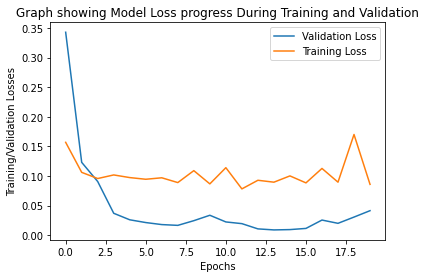

In [47]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Graph showing Model Loss progress During Training and Validation')
plt.ylabel('Training/Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Validation Loss','Training Loss' ])
#Plotting the train and validation loss in a graph
